![](images/12_01.png)

In [1]:
library(ggplot2)
library('gridExtra')
library('ggExtra')
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



In [2]:
land = read.csv("./data/landdata_states.csv")

In [3]:
head(land)

,State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index,Year,Qrtr
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,AK,West,2010.25,224952,160599,64352,28.6,1.481,1.552,2010,1
2,AK,West,2010.50,225511,160252,65259,28.9,1.484,1.576,2010,2
3,AK,West,2009.75,225820,163791,62029,27.5,1.486,1.494,2009,3
4,AK,West,2010.00,224994,161787,63207,28.1,1.481,1.524,2009,4
5,AK,West,2008.00,234590,155400,79190,33.8,1.544,1.885,2007,4
6,AK,West,2008.25,233714,157458,76256,32.6,1.538,1.817,2008,1


In [4]:
summary(land)

    State              region               Date        Home.Value    
 Length:7803        Length:7803        Min.   :1975   Min.   : 18763  
 Class :character   Class :character   1st Qu.:1985   1st Qu.: 62235  
 Mode  :character   Mode  :character   Median :1994   Median :108724  
                                       Mean   :1994   Mean   :135313  
                                       3rd Qu.:2004   3rd Qu.:172030  
                                       Max.   :2013   Max.   :862885  
 Structure.Cost     Land.Value     Land.Share..Pct. Home.Price.Index
 Min.   : 17825   Min.   :   938   Min.   : 5.00    Min.   :0.1350  
 1st Qu.: 53776   1st Qu.:  4178   1st Qu.: 5.00    1st Qu.:0.4550  
 Median : 88352   Median :  9478   Median :10.40    Median :0.7830  
 Mean   : 99534   Mean   : 35779   Mean   :18.17    Mean   :0.8695  
 3rd Qu.:134871   3rd Qu.: 38631   3rd Qu.:26.30    3rd Qu.:1.2075  
 Max.   :325595   Max.   :594417   Max.   :81.70    Max.   :2.8930  
 Land.Price.Index   

In [5]:
str(land)

'data.frame':	7803 obs. of  11 variables:
 $ State           : chr  "AK" "AK" "AK" "AK" ...
 $ region          : chr  "West" "West" "West" "West" ...
 $ Date            : num  2010 2010 2010 2010 2008 ...
 $ Home.Value      : int  224952 225511 225820 224994 234590 233714 232999 232164 231039 229395 ...
 $ Structure.Cost  : int  160599 160252 163791 161787 155400 157458 160092 162704 164739 165424 ...
 $ Land.Value      : int  64352 65259 62029 63207 79190 76256 72906 69460 66299 63971 ...
 $ Land.Share..Pct.: num  28.6 28.9 27.5 28.1 33.8 32.6 31.3 29.9 28.7 27.9 ...
 $ Home.Price.Index: num  1.48 1.48 1.49 1.48 1.54 ...
 $ Land.Price.Index: num  1.55 1.58 1.49 1.52 1.89 ...
 $ Year            : int  2010 2010 2009 2009 2007 2008 2008 2008 2008 2009 ...
 $ Qrtr            : int  1 2 3 4 4 1 2 3 4 1 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



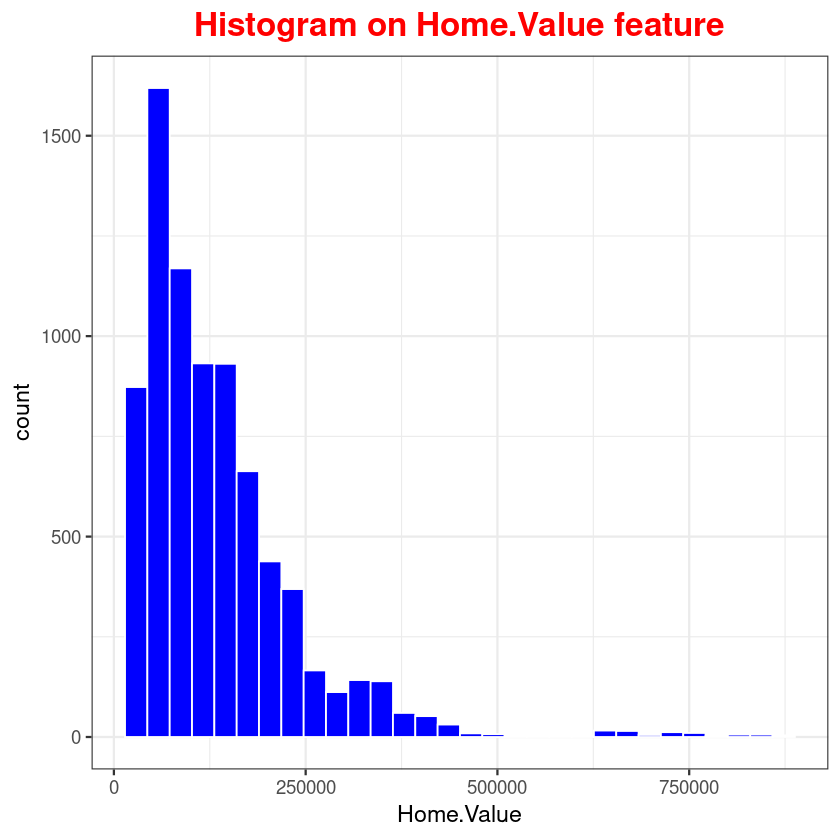

In [6]:
plot = ggplot(land, aes(Home.Value)) + 
     geom_histogram(color = 'white', fill = 'blue') +
     ggtitle("Histogram on Home.Value feature") + 
     theme_bw(base_size = 14) +
     theme(plot.title = element_text(color = 'red', size = 20,
                                     face = 'bold', hjust = 0.5))

plot

In [7]:
land_date = land %>% filter(Date == '2001.25')

In [8]:
head(land_date)

,State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index,Year,Qrtr
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,AK,West,2001.25,156664,110027,46637,29.8,1.031,1.041,2001,1
2,AL,South,2001.25,115113,86846,28267,24.6,1.030,1.068,2001,1
3,AR,South,2001.25,100293,83398,16894,16.8,1.039,1.110,2001,1
4,AZ,West,2001.25,168724,92652,76072,45.1,1.049,1.084,2001,1
5,CA,West,2001.25,330676,118865,211811,64.1,1.102,1.152,2001,1
6,CO,West,2001.25,226894,92568,134326,59.2,1.075,1.104,2001,1


`geom_smooth()` using formula 'y ~ x'



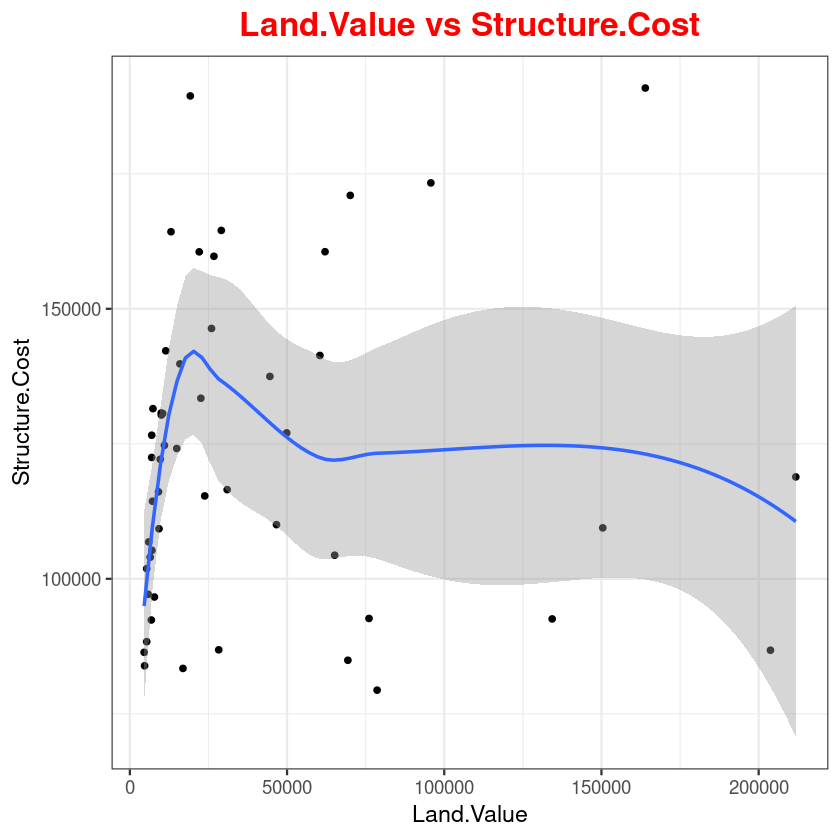

In [9]:
plot = ggplot(data = land_date, aes(x = Land.Value, y = Structure.Cost)) + 
       geom_point() + geom_smooth(method = 'loess') + # vẽ đường phi tuyến
       ggtitle("Land.Value vs Structure.Cost") + 
       theme_bw(base_size = 14) + 
       theme(plot.title = element_text(color = 'red', size = 20,
                                       face = 'bold', hjust = 0.5)) 

plot

In [10]:
land_date$Land.Value_log = log(land_date$Land.Value)

In [11]:
head(land_date$Land.Value_log)

[1] 10.750149 10.249450  9.734714 11.239436 12.263450 11.808025

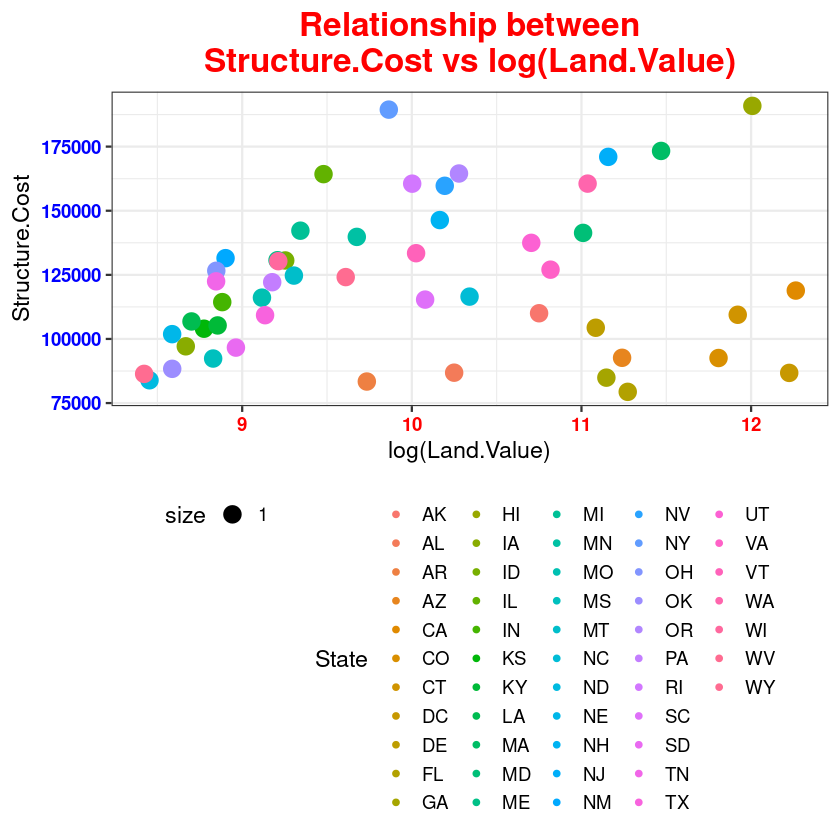

In [12]:
plot = ggplot(data = land_date, aes(x = Land.Value_log,
                                    y = Structure.Cost,
                                    fill = State,
                                    color = State,
                                    lwd = 1))
plot = plot + geom_point()
plot = plot + ylab("Structure.Cost")
plot = plot + xlab('log(Land.Value)')
plot = plot + ggtitle("Relationship between\nStructure.Cost vs log(Land.Value)")
plot = plot + theme_bw(base_size = 14)
plot = plot + theme(legend.position = 'bottom',
                    plot.title = element_text(color = 'red', size = 20, face = 'bold', hjust = 0.5),
                    axis.text.x = element_text(face = 'bold', color = 'red'),
                    axis.text.y = element_text(face = 'bold', color = 'blue'))
plot